# API Exercises

Here are two exercises that involve working with APIs and dictionaries.

One is using the Open Brewery API found at https://www.openbrewerydb.org/, and the other is using the API for UK Police Data, found at https://data.police.uk/docs/.

You can complete them in either order!

Remember that you can create new cells with esc + a or b

## Breweries

### Q1: Load the first page of results with 50 results per page

In [5]:
def get_page(page, per_page=50):
   url = f'https://api.openbrewerydb.org/breweries?page={page}&per_page=50'
   return requests.get(url).json()

### Q2: This is only the first 50 results.  Get the next 50 and put them together.

In [4]:
import requests

In [5]:
breweries = [*get_page(1), *get_page(2)]

### Q3: How many of these 100 breweries in are in Alaska?

In [6]:
len([brewery for brewery in breweries if brewery["state"] == "Alaska"])

3

### Q4: Of these 100 breweries, what are the different unique brewery types?

In [7]:
{ brewery["brewery_type"] for brewery in breweries }

{'brewpub', 'contract', 'micro', 'planning', 'proprietor', 'regional'}

### Q5: What is the cloest brewery to "Devil's Potion Brewing Company LLC" ?
* Hint 1: Use Euclidian distance w/ longitude and latitude (assume longitude and latitude are a Carteisan coordinate system)
* Hint 2: You'll have to ignore the entries with "none" for latitude or longitude

In [8]:
from math import sqrt
from functools import partial

def distance_between(brewery1, brewery2):
    return sqrt(
        (float(brewery1["latitude"]) - float(brewery2["latitude"])) ** 2 + \
        (float(brewery1["longitude"]) - float(brewery2["longitude"])) ** 2
    )

def closest_brewery_to(target_brewery):
    breweries_with_location = [
        brewery for brewery in breweries
        if brewery["latitude"] is not None
        and brewery["name"] is not target_brewery["name"]
    ]
    return min(breweries_with_location, key = partial(distance_between, target_brewery))

def find(predicate, elements):
    return next((element for element in elements if predicate(element)), None)

In [9]:
devils_potion = find(lambda x: x["name"] == "Devil's Potion Brewing Company LLC", breweries)
closest_brewery_to(devils_potion)

{'id': 924,
 'name': 'Port Brewing Co / The Lost Abbey',
 'brewery_type': 'micro',
 'street': '155 Mata Way Ste 104',
 'address_2': None,
 'address_3': None,
 'city': 'San Marcos',
 'state': 'California',
 'county_province': None,
 'postal_code': '92069-2983',
 'country': 'United States',
 'longitude': '-117.149141',
 'latitude': '33.141537',
 'phone': '8009186816',
 'website_url': 'http://www.portbrewing.com',
 'updated_at': '2018-08-24T00:01:07.397Z',
 'created_at': '2018-07-24T01:32:59.652Z'}

### Q6: Write a function to find the closest brewery to any other given brewery

### Q7: How would you get the first 10 pages from this API and put them all together using a for loop?

In [10]:
results = [item for i in range(1,11) for item in get_page(i)]

In [11]:
len(results)

500

# Crime in the UK

### We will be analyzing different crimes reported in the UK as provided by https://data.police.uk/docs/

# Exploratory analysis
##### 1. How many total crimes were there at latitude : 52.63902 and -1.131321 on November of 2017.
Use the street level crimes data, the documentation for the API can be found at https://data.police.uk/docs/method/crime-street/

In [12]:
def get_crimes(lat, long, date=None):
    url = f"https://data.police.uk/api/crimes-street/all-crime?lat={lat}&lng={long}&date={date}"
    return requests.get(url).json()

In [13]:
crimes = get_crimes(52.63902, -1.131321, "2017-11")
len(crimes)

1334

##### 2. We've queried the API once, but it could get annoying to retype the url over and over again, create a function `make_api_request` that enables you to query the API.


 The parameters for the function should be:
* lat (float) : latitude
* lng (float) : longitude
* date (string): Date in the format YYYY-MM
    * default value = `None`
    
And it should return a json object of 

for more information on default values check out http://blog.thedigitalcatonline.com/blog/2015/02/11/default-arguments-in-python/

In [14]:
get_crimes(51.5017861, -0.1432319)

[{'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '51.511783',
   'street': {'id': 956547, 'name': 'On or near Nightclub'},
   'longitude': '-0.129778'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 87000527,
  'location_subtype': '',
  'month': '2020-09'},
 {'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '51.511783',
   'street': {'id': 956547, 'name': 'On or near Nightclub'},
   'longitude': '-0.129778'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 87000528,
  'location_subtype': '',
  'month': '2020-09'},
 {'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '51.511783',
   'street': {'id': 956547, 'name': 'On or near Nightclub'},
   'longitude': '-0.129778'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 87000529,
  'location_subtype': '',
  'month': '2020-09'},
 {'cate

##### 3. Write a function `categories_of_crime` that will determine the count of each type of crime for a given latitude and longitude. This is labelled as 'category' in the records. Your function should call the `make_api_request` function you created.

The parameters for the function should be:

* lat (float) : latitude
* lng (float) : longitude
* date (str) default = None

The function should return:
* a dictionary with the count of each type of crime



Once you've created the function, try it with these locations
* lat, lng of 51.5017861,-0.1432319   (Buckingham Palace)
* lat, lng of 53.480161, -2.245163     (Manchester)

In [15]:
from collections import Counter

def categories_of_crime(lat, long, date=None):
    return Counter([ crime["category"] for crime in get_crimes(lat, long, date=date) ])

In [16]:
crimes_in_buckingham_palace = categories_of_crime(51.5017861, -0.1432319)
crimes_in_buckingham_palace

Counter({'anti-social-behaviour': 640,
         'bicycle-theft': 76,
         'burglary': 89,
         'criminal-damage-arson': 114,
         'drugs': 134,
         'other-theft': 517,
         'possession-of-weapons': 10,
         'public-order': 162,
         'robbery': 118,
         'shoplifting': 195,
         'theft-from-the-person': 349,
         'vehicle-crime': 207,
         'violent-crime': 344,
         'other-crime': 12})

In [17]:
crimes_in_manchester = categories_of_crime(53.480161, -2.245163)
crimes_in_manchester

Counter({'bicycle-theft': 3,
         'criminal-damage-arson': 1,
         'drugs': 10,
         'other-theft': 14,
         'possession-of-weapons': 4,
         'public-order': 16,
         'shoplifting': 2,
         'theft-from-the-person': 4,
         'vehicle-crime': 2,
         'violent-crime': 11,
         'other-crime': 1})

**Bonus**: 
* Write a function that determines the difference between Buckingham Palace and Manchester in terms of the number of crimes in each category.
    * In which category is there the largest absolute difference between the category of crime?
* Create a histogram depiction of the categories of crime

In [18]:
crime_difference = crimes_in_buckingham_palace.copy()

for key, value in crimes_in_manchester.items():
    crimes_in_buckingham_palace[key] = abs(crimes_in_buckingham_palace.get(key, 0) - value)

crime_difference

Counter({'anti-social-behaviour': 640,
         'bicycle-theft': 76,
         'burglary': 89,
         'criminal-damage-arson': 114,
         'drugs': 134,
         'other-theft': 517,
         'possession-of-weapons': 10,
         'public-order': 162,
         'robbery': 118,
         'shoplifting': 195,
         'theft-from-the-person': 349,
         'vehicle-crime': 207,
         'violent-crime': 344,
         'other-crime': 12})

In [19]:
crimes_in_buckingham_palace

Counter({'anti-social-behaviour': 640,
         'bicycle-theft': 73,
         'burglary': 89,
         'criminal-damage-arson': 113,
         'drugs': 124,
         'other-theft': 503,
         'possession-of-weapons': 6,
         'public-order': 146,
         'robbery': 118,
         'shoplifting': 193,
         'theft-from-the-person': 345,
         'vehicle-crime': 205,
         'violent-crime': 333,
         'other-crime': 11})

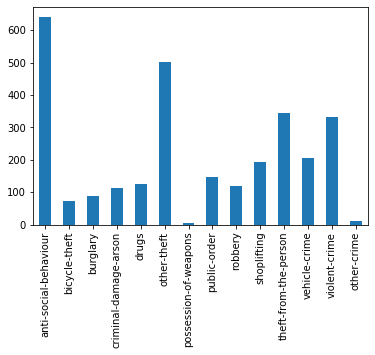

In [26]:
import pandas as pd

pd.Series(crimes_in_buckingham_palace).plot.bar()

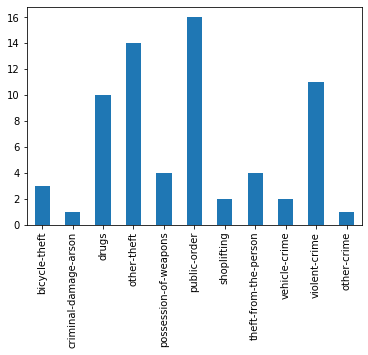

In [21]:
pd.Series(crimes_in_manchester).plot.bar()

##### 4. Create a function `find_outcome_statuses` that will determine outcome statuses for a given latitude and longitude and date (optional)?
Investigate the data to determine where the outcome statuses are located.

**NOTE**: You'll notice that some of these crimes do not have crime outcomes. Make these into the category of "Not Resolved."

**NOTE 2**: These might take a long time to execute if you do not specify a month

**Bonus**: What is the ratio of crimes investigated to those not investigated? Is it higher near London or Manchester?

In [22]:
def find_outcome_statuses(lat, long, date=None):
    outcomes = { "solved": 0, "unsolved": 0 }
    crimes = get_crimes(lat, long, date)
    for crime in crimes:
        if crime["outcome_status"] is not None:
            outcomes["solved"] += 1
        else:
            outcomes["unsolved"] += 1
    return outcomes
            
find_outcome_statuses(51.5017861, -0.1432319)

{'solved': 2327, 'unsolved': 640}

In [1]:
find_outcome_statuses(53.480161, -2.245163)

NameError: name 'find_outcome_statuses' is not defined

##### 5. Write a function `month_highest_crimes` that will return the month that had the highest number of crimes for a latitude, longitude and a year.

Inputs
* lat (float) : latitude
* lng (float) : longitude
* year (str) : in the format YYYY

Output
* month with highest crime (int)

**Bonus** Make a graph of how the number of crimes changed over time for a year. This will likely require a new function. Is seasonality a factor? Do the type of crimes change over time?

In [31]:
def get_yearly_crimes(lat, long, year):
    return { month: get_crimes(lat, long, date=f"{year}-{month}") for month in range(1,13) }

In [4]:
yearly_crimes = get_yearly_crimes(53.480161, -2.245163, 2019)

NameError: name 'get_yearly_crimes' is not defined

In [6]:
yearly_crimes

NameError: name 'yearly_crimes' is not defined

In [3]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>